In [1]:
from sklearn.preprocessing import MinMaxScaler
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\\Users\\86130\\00.Project\\03.Datasets\Climate data-10-21.csv')
print(df)

           date                        weather max temperature  \
0      1/1/2018                  cloudy/cloudy             22℃   
1      1/2/2018                  cloudy/cloudy             22℃   
2      1/3/2018                cloudy/overcast             23℃   
3      1/4/2018              cloudy/light rain             21℃   
4      1/5/2018            overcast/light rain             19℃   
...         ...                            ...             ...   
1334  8/27/2021  thundershowers/thundershowers             35℃   
1335  8/28/2021          thundershowers/cloudy             33℃   
1336  8/29/2021  thundershowers/thundershowers             32℃   
1337  8/30/2021                showers/showers             34℃   
1338  8/31/2021         thundershowers/showers             32℃   

     min temperature             daytime wind               night wind  
0                12℃  variable winds <3 knots  variable winds <3 knots  
1                15℃  variable winds <3 knots  variable winds

In [3]:
df.head()

,date,weather,max temperature,min temperature,daytime wind,night wind
0,1/1/2018,cloudy/cloudy,22℃,12℃,variable winds <3 knots,variable winds <3 knots
1,1/2/2018,cloudy/cloudy,22℃,15℃,variable winds <3 knots,variable winds <3 knots
2,1/3/2018,cloudy/overcast,23℃,15℃,variable winds <3 knots,variable winds <3 knots
3,1/4/2018,cloudy/light rain,21℃,16℃,variable winds <3 knots,variable winds <3 knots
4,1/5/2018,overcast/light rain,19℃,13℃,variable winds <3 knots,variable winds <3 knots


In [4]:
df.isnull()

,date,weather,max temperature,min temperature,daytime wind,night wind
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1334,False,False,False,False,False,False
1335,False,False,False,False,False,False
1336,False,False,False,False,False,False
1337,False,False,False,False,False,False


In [5]:
#df.dropna(axis=0,how='any')

In [6]:
df[['weather_1', 'weather_2']] = df['weather'].str.split('/', expand=True)

In [7]:
df.drop(columns=['weather'], inplace=True)
print(df)

           date max temperature min temperature             daytime wind  \
0      1/1/2018             22℃             12℃  variable winds <3 knots   
1      1/2/2018             22℃             15℃  variable winds <3 knots   
2      1/3/2018             23℃             15℃  variable winds <3 knots   
3      1/4/2018             21℃             16℃  variable winds <3 knots   
4      1/5/2018             19℃             13℃  variable winds <3 knots   
...         ...             ...             ...                      ...   
1334  8/27/2021             35℃             26℃    north winds 1-2 knots   
1335  8/28/2021             33℃             26℃    north winds 1-2 knots   
1336  8/29/2021             32℃             25℃    north winds 1-2 knots   
1337  8/30/2021             34℃             26℃    north winds 1-2 knots   
1338  8/31/2021             32℃             26℃    north winds 1-2 knots   

                   night wind       weather_1       weather_2  
0     variable winds <3

In [8]:
df.head(10)

,date,max temperature,min temperature,daytime wind,night wind,weather_1,weather_2
0,1/1/2018,22℃,12℃,variable winds <3 knots,variable winds <3 knots,cloudy,cloudy
1,1/2/2018,22℃,15℃,variable winds <3 knots,variable winds <3 knots,cloudy,cloudy
2,1/3/2018,23℃,15℃,variable winds <3 knots,variable winds <3 knots,cloudy,overcast
3,1/4/2018,21℃,16℃,variable winds <3 knots,variable winds <3 knots,cloudy,light rain
4,1/5/2018,19℃,13℃,variable winds <3 knots,variable winds <3 knots,overcast,light rain
5,1/6/2018,15℃,11℃,variable winds <3 knots,variable winds <3 knots,light rain-moderate rain,moderate rain-heavy rain
6,1/7/2018,15℃,7℃,variable winds <3 knots,north winds 4-5 knots,heavy rain,moderate rain
7,1/8/2018,12℃,5℃,north winds 4-5 knots,north winds 3-4 knots,moderate rain,light rain-moderate rain
8,1/9/2018,9℃,6℃,variable winds <3 knots,variable winds <3 knots,light rain,overcast
9,1/10/2018,14℃,7℃,variable winds <3 knots,variable winds <3 knots,cloudy,cloudy


In [9]:
#df.to_csv(r"C:\Users\86130\01.CDS590\Climate Dataset.csv",index=True,header=True) 

In [10]:
print(df['weather_1'].dtype)

object


In [11]:
weather1_counts = df['weather_1'].value_counts()
print(weather1_counts)

cloudy                        453
thundershowers                212
overcast                      164
sunny                         158
showers                        96
moderate rain                  87
light rain                     78
heavy rain                     50
moderate rain-heavy rain       14
torrential rain                14
light rain-moderate rain       10
fog                             2
heavy rain-torrential rain      1
Name: weather_1, dtype: int64


In [12]:
weather2_counts = df['weather_2'].value_counts()
print(weather2_counts)

cloudy                        572
overcast                      186
sunny                         141
thundershowers                130
showers                       103
light rain                     75
moderate rain                  68
heavy rain                     33
light rain-moderate rain        9
torrential rain                 8
moderate rain-heavy rain        5
heavy rain-torrential rain      4
fog                             3
partly cloudy                   2
Name: weather_2, dtype: int64


In [13]:
weather1_mapping = {
    'cloudy': 0,
    'overcast': 1,
    'sunny': 2,
    'fog':3,
    'light rain':4,
    'moderate rain':5,
    'heavy rain':6,
    'torrential rain':7,
    'showers':8,
    'thunderstorm':9,
    'thundershowers':10,
    'light rain-moderate rain':11,
    'moderate rain-heavy rain':12,
    'heavy rain-torrential rain':13
}

In [14]:
df['weather1_numeric'] = df['weather_1'].map(weather1_mapping)

In [15]:
df.head()

,date,max temperature,min temperature,daytime wind,night wind,weather_1,weather_2,weather1_numeric
0,1/1/2018,22℃,12℃,variable winds <3 knots,variable winds <3 knots,cloudy,cloudy,0
1,1/2/2018,22℃,15℃,variable winds <3 knots,variable winds <3 knots,cloudy,cloudy,0
2,1/3/2018,23℃,15℃,variable winds <3 knots,variable winds <3 knots,cloudy,overcast,0
3,1/4/2018,21℃,16℃,variable winds <3 knots,variable winds <3 knots,cloudy,light rain,0
4,1/5/2018,19℃,13℃,variable winds <3 knots,variable winds <3 knots,overcast,light rain,1


In [16]:
weather2_mapping1 = {
    'cloudy': 0,
    'overcast': 1,
    'sunny': 2,
    'fog':3,
    'light rain':4,
    'moderate rain':5,
    'heavy rain':6,
    'torrential rain':7,
    'showers':8,
    'thunderstorm':9,
    'thundershowers':10,
    'partly cloudy':11,
    'light rain-moderate rain':12,
    'moderate rain-heavy rain':13,
    'heavy rain-torrential rain':14
}

In [17]:
df['weather2_numeric'] = df['weather_2'].map(weather2_mapping1)

In [18]:
df.head(5)

,date,max temperature,min temperature,daytime wind,night wind,weather_1,weather_2,weather1_numeric,weather2_numeric
0,1/1/2018,22℃,12℃,variable winds <3 knots,variable winds <3 knots,cloudy,cloudy,0,0
1,1/2/2018,22℃,15℃,variable winds <3 knots,variable winds <3 knots,cloudy,cloudy,0,0
2,1/3/2018,23℃,15℃,variable winds <3 knots,variable winds <3 knots,cloudy,overcast,0,1
3,1/4/2018,21℃,16℃,variable winds <3 knots,variable winds <3 knots,cloudy,light rain,0,4
4,1/5/2018,19℃,13℃,variable winds <3 knots,variable winds <3 knots,overcast,light rain,1,4


In [19]:
daytime_wind_mapping = {
    'variable breeze':0,
    'variable winds 1-2 knots':1,
    'variable winds <3 knots':2,
    'light breeze < 3 knots':3,
    'east winds 1-2 knots':4,
    'east winds 3-4 knots':5,
    'east winds 8-9 knots':6,
    'south winds 1-2 knots':7,
    'south winds 3-4 knots':8,
    'south winds 4-5 knots':9,
    'southeast winds 1-2 knots':10,
    'southeast winds 3-4 knots':11,
    'southeast winds 4-5 knots':12,
    'southwest winds 1-2 knots':13,
    'southwest winds 3-4 knots':14,
    'north winds 1-2 knots':15,
    'north winds 3-4 knots':16,
    'north winds 4-5 knots':17,
    'northeast winds 1-2 knots':18,
    'northeast winds 3-4 knots':19,
    'northeast winds easterly 2 knots':20
}

In [20]:
df['daytimewind_numeric'] = df['daytime wind'].map(daytime_wind_mapping)

In [21]:
night_wind_mapping = {
    'variable breeze':0,
    'variable winds 1-2 knots':1,
    'variable winds <3 knots':2,
    'light breeze < 3 knots':3,
    'east winds 1-2 knots':4,
    'east winds 3-4 knots':5,
    'east winds 8-9 knots':6,
    'south winds 1-2 knots':7,
    'south winds 3-4 knots':8,
    'southeast winds 1-2 knots':9,
    'southeast winds 3-4 knots':10,
    'southeast winds 4-5 knots':11,
    'southwest winds 1-2 knots':12,
    'southwest winds 3-4 knots':13,
    'north winds 1-2 knots':14,
    'north winds 3-4 knots':15,
    'north winds 4-5 knots':16,
    'northeast winds 1-2 knots':17,
    'northeast winds 3-4 knots':18,
    'northeastern winds easterly 2 knots':19
}

In [22]:
df['nightwind_numeric'] = df['night wind'].map(night_wind_mapping)

In [23]:
df.head()

,date,max temperature,min temperature,daytime wind,night wind,weather_1,weather_2,weather1_numeric,weather2_numeric,daytimewind_numeric,nightwind_numeric
0,1/1/2018,22℃,12℃,variable winds <3 knots,variable winds <3 knots,cloudy,cloudy,0,0,2,2
1,1/2/2018,22℃,15℃,variable winds <3 knots,variable winds <3 knots,cloudy,cloudy,0,0,2,2
2,1/3/2018,23℃,15℃,variable winds <3 knots,variable winds <3 knots,cloudy,overcast,0,1,2,2
3,1/4/2018,21℃,16℃,variable winds <3 knots,variable winds <3 knots,cloudy,light rain,0,4,2,2
4,1/5/2018,19℃,13℃,variable winds <3 knots,variable winds <3 knots,overcast,light rain,1,4,2,2


In [24]:
#df.to_csv(r"C:\Users\86130\01.CDS590\Climate Dataset-Numeric.csv",index=True,header=True) 

In [25]:
df.isnull()

,date,max temperature,min temperature,daytime wind,night wind,weather_1,weather_2,weather1_numeric,weather2_numeric,daytimewind_numeric,nightwind_numeric
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1334,False,False,False,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False,False,False
1337,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.drop(columns=['weather_1','weather_2','daytime wind','night wind'], inplace=True)

In [27]:
df.head()

,date,max temperature,min temperature,weather1_numeric,weather2_numeric,daytimewind_numeric,nightwind_numeric
0,1/1/2018,22℃,12℃,0,0,2,2
1,1/2/2018,22℃,15℃,0,0,2,2
2,1/3/2018,23℃,15℃,0,1,2,2
3,1/4/2018,21℃,16℃,0,4,2,2
4,1/5/2018,19℃,13℃,1,4,2,2


In [28]:
# Remove the "°C" and "°F" characters from the temperature string and convert it to a floating point number
df['max temperature'] = df['max temperature'].apply(lambda x: float(x.replace('℃', '').replace('°F', '')))
df['min temperature'] = df['min temperature'].apply(lambda x: float(x.replace('℃', '').replace('°F', '')))
# Printing updated data
print(df)

           date  max temperature  min temperature  weather1_numeric  \
0      1/1/2018             22.0             12.0                 0   
1      1/2/2018             22.0             15.0                 0   
2      1/3/2018             23.0             15.0                 0   
3      1/4/2018             21.0             16.0                 0   
4      1/5/2018             19.0             13.0                 1   
...         ...              ...              ...               ...   
1334  8/27/2021             35.0             26.0                10   
1335  8/28/2021             33.0             26.0                10   
1336  8/29/2021             32.0             25.0                10   
1337  8/30/2021             34.0             26.0                 8   
1338  8/31/2021             32.0             26.0                10   

      weather2_numeric  daytimewind_numeric  nightwind_numeric  
0                    0                    2                  2  
1                

In [29]:
df.head()

,date,max temperature,min temperature,weather1_numeric,weather2_numeric,daytimewind_numeric,nightwind_numeric
0,1/1/2018,22.0,12.0,0,0,2,2
1,1/2/2018,22.0,15.0,0,0,2,2
2,1/3/2018,23.0,15.0,0,1,2,2
3,1/4/2018,21.0,16.0,0,4,2,2
4,1/5/2018,19.0,13.0,1,4,2,2


In [30]:
df.to_csv(r"C:\Users\86130\00.Project\00.Data Preprocessing\Climate Dataset-Numeric-1206.csv",index=True,header=True) 

In [31]:
df1=pd.read_csv(r'C:\\Users\\86130\\00.Project\\00.Data Preprocessing\\AfterProcessing_IndustryElectric.csv')
print(df1)

        Datetime                    SectorType Datetime.1  AvgMaxPower  \
0     2019-01-01  Large industrial electricity   1/1/2019  117888.3300   
1     2019-01-01          business electricity   1/1/2019   64027.8582   
2     2019-01-01              general industry   1/1/2019    6179.9364   
3     2019-01-02              general industry   1/2/2019   10711.9704   
4     2019-01-02          business electricity   1/2/2019   75467.2143   
...          ...                           ...        ...          ...   
3609  2021-08-30          non-general industry  8/30/2021    3316.1904   
3610  2021-08-31  Large industrial electricity  8/31/2021  101834.8440   
3611  2021-08-31          non-general industry  8/31/2021    3223.6920   
3612  2021-08-31          business electricity  8/31/2021   96396.2568   
3613  2021-08-31              general industry  8/31/2021   10329.5676   

       AvgMinPower  Type  SectorType_encoded  
0     51526.569000     1                   0  
1     23758.79700

In [32]:
df1 = df1.rename(columns={'Datetime.1':'time'})
df1.head()

,Datetime,SectorType,time,AvgMaxPower,AvgMinPower,Type,SectorType_encoded
0,2019-01-01,Large industrial electricity,1/1/2019,117888.3300,51526.5690,1,0
1,2019-01-01,business electricity,1/1/2019,64027.8582,23758.7970,2,1
2,2019-01-01,general industry,1/1/2019,6179.9364,4093.0467,3,2
3,2019-01-02,general industry,1/2/2019,10711.9704,3971.5308,3,2
4,2019-01-02,business electricity,1/2/2019,75467.2143,20231.6265,2,1


In [33]:
df1.drop(columns=['Datetime','Type','SectorType_encoded'], inplace=True)

In [34]:
print(df1)

                        SectorType       time  AvgMaxPower   AvgMinPower
0     Large industrial electricity   1/1/2019  117888.3300  51526.569000
1             business electricity   1/1/2019   64027.8582  23758.797000
2                 general industry   1/1/2019    6179.9364   4093.046700
3                 general industry   1/2/2019   10711.9704   3971.530800
4             business electricity   1/2/2019   75467.2143  20231.626500
...                            ...        ...          ...           ...
3609          non-general industry  8/30/2021    3316.1904   1434.968400
3610  Large industrial electricity  8/31/2021  101834.8440  27590.812169
3611          non-general industry  8/31/2021    3223.6920   1401.982200
3612          business electricity  8/31/2021   96396.2568  21291.304200
3613              general industry  8/31/2021   10329.5676   3732.405600

[3614 rows x 4 columns]


In [35]:
# Merge the two DataFrames on the "datatime" column
merged_df = pd.merge(df1, df, left_on='time', right_on='date', how='inner')

In [36]:
merged_df.head(5)

,SectorType,time,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,weather1_numeric,weather2_numeric,daytimewind_numeric,nightwind_numeric
0,Large industrial electricity,1/1/2019,117888.3300,51526.5690,1/1/2019,12.0,7.0,1,1,1,1
1,business electricity,1/1/2019,64027.8582,23758.7970,1/1/2019,12.0,7.0,1,1,1,1
2,general industry,1/1/2019,6179.9364,4093.0467,1/1/2019,12.0,7.0,1,1,1,1
3,general industry,1/2/2019,10711.9704,3971.5308,1/2/2019,11.0,6.0,4,4,1,1
4,business electricity,1/2/2019,75467.2143,20231.6265,1/2/2019,11.0,6.0,4,4,1,1


In [37]:
print(merged_df)

                        SectorType       time  AvgMaxPower   AvgMinPower  \
0     Large industrial electricity   1/1/2019  117888.3300  51526.569000   
1             business electricity   1/1/2019   64027.8582  23758.797000   
2                 general industry   1/1/2019    6179.9364   4093.046700   
3                 general industry   1/2/2019   10711.9704   3971.530800   
4             business electricity   1/2/2019   75467.2143  20231.626500   
...                            ...        ...          ...           ...   
3605          non-general industry  8/30/2021    3316.1904   1434.968400   
3606  Large industrial electricity  8/31/2021  101834.8440  27590.812169   
3607          non-general industry  8/31/2021    3223.6920   1401.982200   
3608          business electricity  8/31/2021   96396.2568  21291.304200   
3609              general industry  8/31/2021   10329.5676   3732.405600   

           date  max temperature  min temperature  weather1_numeric  \
0      1/1/2019 

In [38]:
# Drop the redundant "datatime" column
merged_df = merged_df.drop(columns='time')

In [39]:
# Display the resulting DataFrame
print(merged_df)

                        SectorType  AvgMaxPower   AvgMinPower       date  \
0     Large industrial electricity  117888.3300  51526.569000   1/1/2019   
1             business electricity   64027.8582  23758.797000   1/1/2019   
2                 general industry    6179.9364   4093.046700   1/1/2019   
3                 general industry   10711.9704   3971.530800   1/2/2019   
4             business electricity   75467.2143  20231.626500   1/2/2019   
...                            ...          ...           ...        ...   
3605          non-general industry    3316.1904   1434.968400  8/30/2021   
3606  Large industrial electricity  101834.8440  27590.812169  8/31/2021   
3607          non-general industry    3223.6920   1401.982200  8/31/2021   
3608          business electricity   96396.2568  21291.304200  8/31/2021   
3609              general industry   10329.5676   3732.405600  8/31/2021   

      max temperature  min temperature  weather1_numeric  weather2_numeric  \
0        

In [40]:
missing_values = merged_df.isnull().sum()

In [41]:
print(missing_values)

SectorType             0
AvgMaxPower            0
AvgMinPower            0
date                   0
max temperature        0
min temperature        0
weather1_numeric       0
weather2_numeric       0
daytimewind_numeric    0
nightwind_numeric      0
dtype: int64


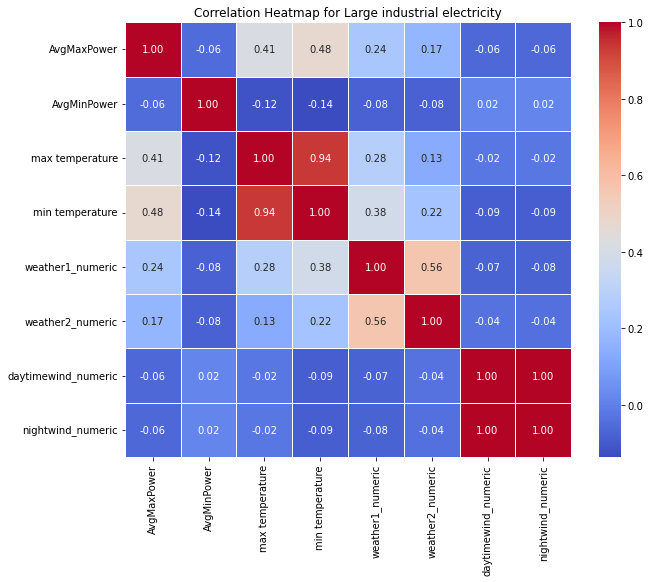

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sectortype' is a column in your DataFrame
largeindustry_df = merged_df[merged_df['SectorType'] == 'Large industrial electricity']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_large = largeindustry_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_large, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for Large industrial electricity')
plt.show()

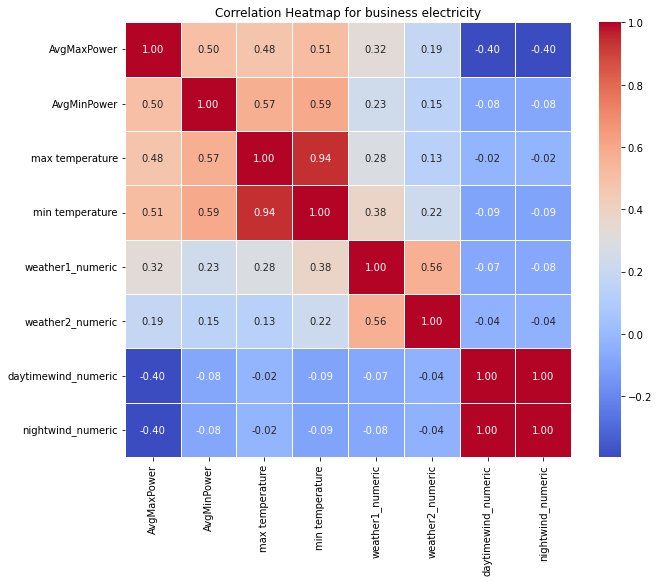

In [43]:
# Assuming 'sectortype' is a column in your DataFrame
business_df = merged_df[merged_df['SectorType'] == 'business electricity']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_business = business_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_business, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for business electricity')
plt.show()

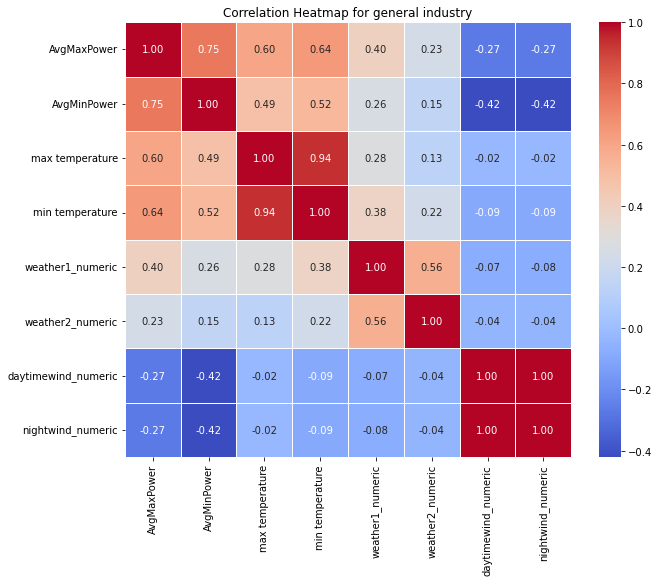

In [44]:
# Assuming 'sectortype' is a column in your DataFrame
general_df = merged_df[merged_df['SectorType'] == 'general industry']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_general = general_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_general, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for general industry')
plt.show()

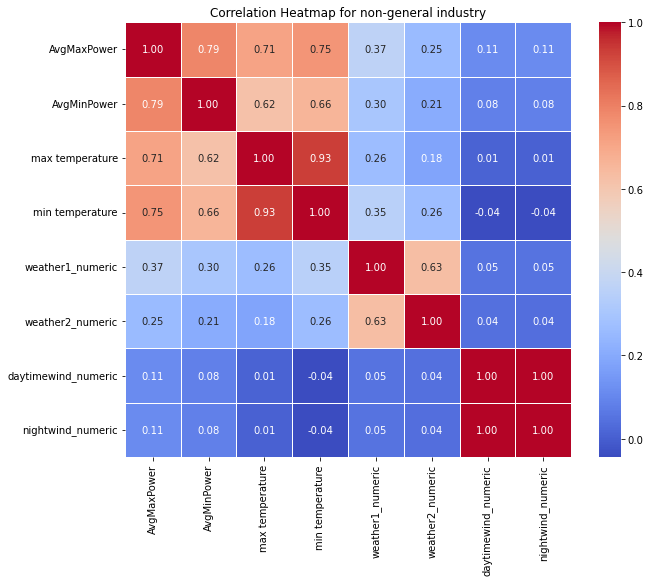

In [45]:
# Assuming 'sectortype' is a column in your DataFrame
nongeneral_df = merged_df[merged_df['SectorType'] == 'non-general industry']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_nongeneral = nongeneral_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_nongeneral, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for non-general industry')
plt.show()

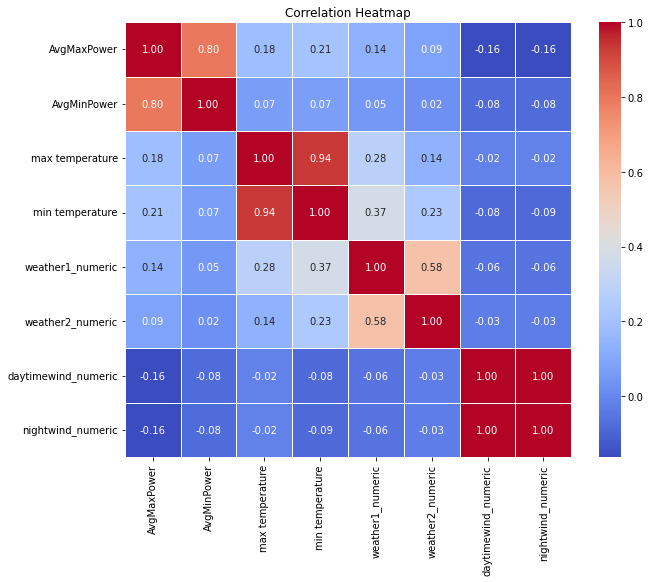

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

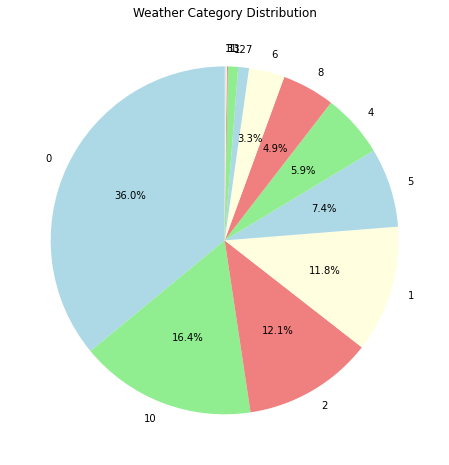

In [47]:
import matplotlib.pyplot as plt

# Assuming your merged DataFrame is named merged_df and you have a 'weather_category' column
weather_counts = merged_df['weather1_numeric'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p >= 1 else '', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Weather Category Distribution')
plt.show()

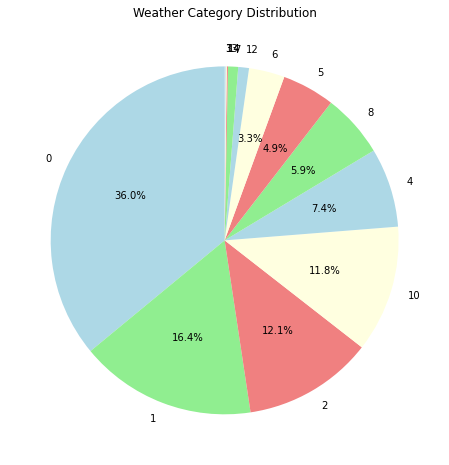

In [48]:
import matplotlib.pyplot as plt

# Assuming your merged DataFrame is named merged_df and you have a 'weather_category' column
weather_counts1 = merged_df['weather2_numeric'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts1.index, autopct=lambda p: '{:.1f}%'.format(p) if p >= 1 else '', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Weather Category Distribution')
plt.show()

In [49]:
da= merged_df
da.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,weather1_numeric,weather2_numeric,daytimewind_numeric,nightwind_numeric
0,Large industrial electricity,117888.3300,51526.5690,1/1/2019,12.0,7.0,1,1,1,1
1,business electricity,64027.8582,23758.7970,1/1/2019,12.0,7.0,1,1,1,1
2,general industry,6179.9364,4093.0467,1/1/2019,12.0,7.0,1,1,1,1
3,general industry,10711.9704,3971.5308,1/2/2019,11.0,6.0,4,4,1,1
4,business electricity,75467.2143,20231.6265,1/2/2019,11.0,6.0,4,4,1,1


In [50]:
da["date"] = pd.to_datetime(da["date"])

#Date features
da["hour"] = da["date"].dt.hour
da["day"] = da["date"].dt.dayofweek
da["month"] = da["date"].dt.month
da["year"] = da["date"].dt.year
da["quarter"] = da["date"].dt.quarter
da["day-of-year"] = da["date"].dt.dayofyear
da["day-of-month"] = da["date"].dt.day
da["week-of-year"] = da["date"].dt.weekofyear

In [51]:
da.index = da["date"]
da = da.drop(["date"],axis=1)

In [52]:
da.head()

,SectorType,AvgMaxPower,AvgMinPower,max temperature,min temperature,weather1_numeric,weather2_numeric,daytimewind_numeric,nightwind_numeric,hour,day,month,year,quarter,day-of-year,day-of-month,week-of-year
date,,,,,,,,,,,,,,,,,
2019-01-01,Large industrial electricity,117888.3300,51526.5690,12.0,7.0,1,1,1,1,0,1,1,2019,1,1,1,1
2019-01-01,business electricity,64027.8582,23758.7970,12.0,7.0,1,1,1,1,0,1,1,2019,1,1,1,1
2019-01-01,general industry,6179.9364,4093.0467,12.0,7.0,1,1,1,1,0,1,1,2019,1,1,1,1
2019-01-02,general industry,10711.9704,3971.5308,11.0,6.0,4,4,1,1,0,2,1,2019,1,2,2,1
2019-01-02,business electricity,75467.2143,20231.6265,11.0,6.0,4,4,1,1,0,2,1,2019,1,2,2,1


Text(0.0, 1.0, 'AvgMaxPower distribution')

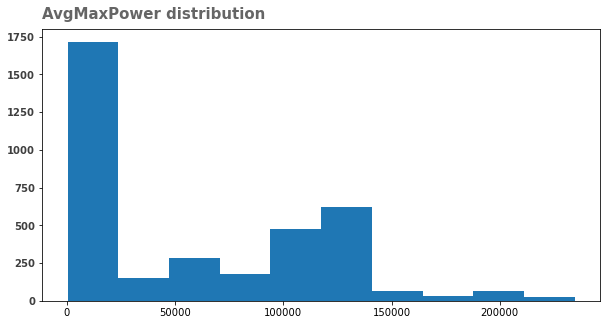

In [53]:
ax, fig = plt.subplots(figsize=(10,5))

plt.hist(da["AvgMaxPower"])

plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("",alpha=0.75, weight="bold")
plt.ylabel("",alpha=0.75, weight="bold")

plt.title("AvgMaxPower distribution", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

Text(0.0, 1.0, 'AvgMinPower distribution')

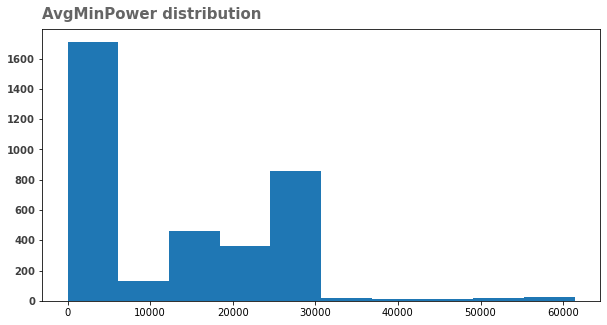

In [54]:
ax, fig = plt.subplots(figsize=(10,5))

plt.hist(da["AvgMinPower"])

plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("",alpha=0.75, weight="bold")
plt.ylabel("",alpha=0.75, weight="bold")

plt.title("AvgMinPower distribution", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

Text(0.0, 1.0, 'max temperature distribution')

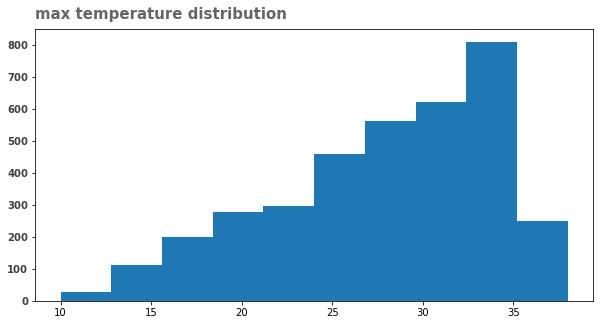

In [55]:
ax, fig = plt.subplots(figsize=(10,5))

plt.hist(da["max temperature"])

plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("",alpha=0.75, weight="bold")
plt.ylabel("",alpha=0.75, weight="bold")

plt.title("max temperature distribution", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

Text(0.5, 1.0, 'Q4 - Consumption')

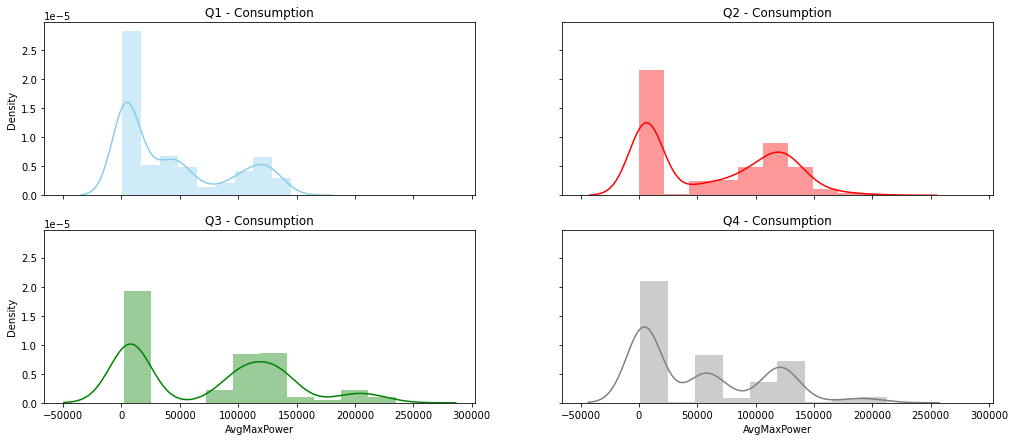

In [56]:
#Data prep
Q1 = da[da["quarter"]==1]
Q2 = da[da["quarter"]==2]
Q3 = da[da["quarter"]==3]
Q4 = da[da["quarter"]==4]

#Plot
fig,axes = plt.subplots(2,2,figsize=(17,7),sharex=True,sharey=True)

sns.distplot(Q1["AvgMaxPower"],color="skyblue", ax=axes[0,0]).set_title("Q1 - Consumption")
sns.distplot(Q2["AvgMaxPower"],color="red", ax=axes[0,1]).set_title("Q2 - Consumption")
sns.distplot(Q3["AvgMaxPower"],color="green", ax=axes[1,0]).set_title("Q3 - Consumption")
sns.distplot(Q4["AvgMaxPower"],color="gray", ax=axes[1,1]).set_title("Q4 - Consumption")

#del Q1, Q2, Q3, Q4

In [57]:
train_test_date = "01-01-2021"
consum_test = da[da.index > train_test_date].copy()
consum_train = da[da.index <= train_test_date].copy()

In [58]:
def lag_features(lag_dataset,period_list):

    temp_data = lag_dataset["AvgMaxPower"]

    for period in period_list:

        lag_dataset["lag_consumption_{}".format(period)] = temp_data.shift(period)
        lag_dataset["mean_rolling_{}".format(period)] = temp_data.rolling(period).mean()
        lag_dataset["max_rolling_{}".format(period)] = temp_data.rolling(period).max()
        lag_dataset["min_rolling_{}".format(period)] = temp_data.rolling(period).min()

    for column in lag_dataset.columns[20:]:

        lag_dataset[column] = lag_dataset[column].fillna(lag_dataset.groupby("hour")["AvgMaxPower"].transform("mean"))
    
    return lag_dataset

In [59]:
consum_train = lag_features(consum_train,[7,14,30])

consum_test = lag_features(consum_test,[7,14,30])

Text(0.0, 1.0, 'Train - Test Split')

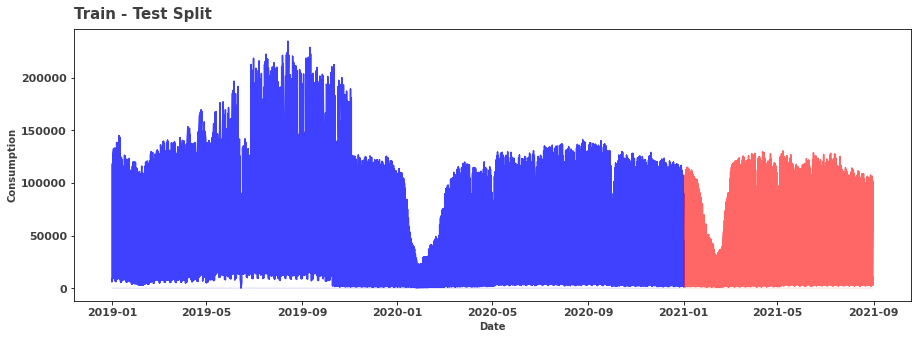

In [60]:
fig,ax = plt.subplots(figsize=(15,5))

coloring = 700

plt.plot(consum_train.index,consum_train["AvgMaxPower"],color="blue", alpha=0.75)
plt.fill_between(consum_train.index,coloring, facecolor="blue", alpha=0.2)

plt.plot(consum_test.index,consum_test["AvgMaxPower"], color = "red", alpha=0.60)
plt.fill_between(consum_test.index,coloring, facecolor="red", alpha=0.2)

plt.xlabel("Date", alpha=0.75, weight="bold")
plt.ylabel("Consumption", alpha=0.75, weight="bold")

plt.xticks(alpha=0.75,weight="bold", fontsize=11)
plt.yticks(alpha=0.75,weight="bold", fontsize=11)

plt.title("Train - Test Split", alpha=0.75, weight="bold", fontsize=15, pad=10, loc="left")

In [61]:
#Train - Test
X_train = consum_train.drop("AvgMaxPower", axis=1) 
y_train = consum_train["AvgMaxPower"]
X_test = consum_test.drop("AvgMaxPower", axis=1)
y_test = consum_test["AvgMaxPower"]

In [62]:
X_train = X_train.drop('SectorType', axis=1)
X_test = X_test.drop('SectorType', axis=1)

In [63]:
#XGBoost
import xgboost as xgb
from xgboost import plot_importance, plot_tree
xgd_reg = xgb.XGBRegressor(n_estimators=100)

xgd_reg.fit(X_train,y_train,
           eval_set=[(X_train,y_train),(X_test,y_test)],
           early_stopping_rounds=50,
           verbose=True)

[0]	validation_0-rmse:62231.10630	validation_1-rmse:47303.94754
[1]	validation_0-rmse:44718.47546	validation_1-rmse:34729.00957
[2]	validation_0-rmse:32655.94830	validation_1-rmse:25986.51897
[3]	validation_0-rmse:24372.80937	validation_1-rmse:20276.67772
[4]	validation_0-rmse:18507.59170	validation_1-rmse:16826.46569
[5]	validation_0-rmse:14767.55377	validation_1-rmse:14832.74854
[6]	validation_0-rmse:12099.83842	validation_1-rmse:13508.18148
[7]	validation_0-rmse:10371.59177	validation_1-rmse:12755.25390
[8]	validation_0-rmse:9140.87020	validation_1-rmse:12265.65490
[9]	validation_0-rmse:8357.13569	validation_1-rmse:11961.05678
[10]	validation_0-rmse:7604.10148	validation_1-rmse:11789.76553
[11]	validation_0-rmse:7050.87688	validation_1-rmse:11922.11118
[12]	validation_0-rmse:6653.19142	validation_1-rmse:11975.19828
[13]	validation_0-rmse:6447.29356	validation_1-rmse:12017.87050
[14]	validation_0-rmse:6234.52821	validation_1-rmse:12007.51961
[15]	validation_0-rmse:5854.98822	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

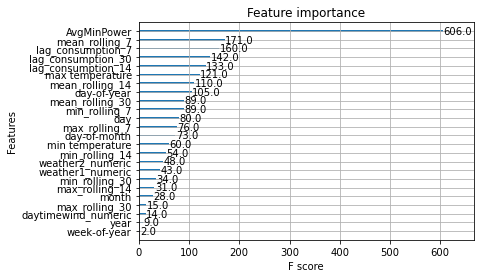

In [64]:
plot_importance(xgd_reg)

In [65]:
def lag_features(lag_dataset,period_list):

    temp_data = lag_dataset["AvgMinPower"]

    for period in period_list:

        lag_dataset["lag_consumption_{}".format(period)] = temp_data.shift(period)
        lag_dataset["mean_rolling_{}".format(period)] = temp_data.rolling(period).mean()
        lag_dataset["max_rolling_{}".format(period)] = temp_data.rolling(period).max()
        lag_dataset["min_rolling_{}".format(period)] = temp_data.rolling(period).min()

    for column in lag_dataset.columns[20:]:

        lag_dataset[column] = lag_dataset[column].fillna(lag_dataset.groupby("hour")["AvgMinPower"].transform("mean"))
    
    return lag_dataset

In [66]:
consum_train = lag_features(consum_train,[7,14,30])

consum_test = lag_features(consum_test,[7,14,30])

Text(0.0, 1.0, 'Train - Test Split')

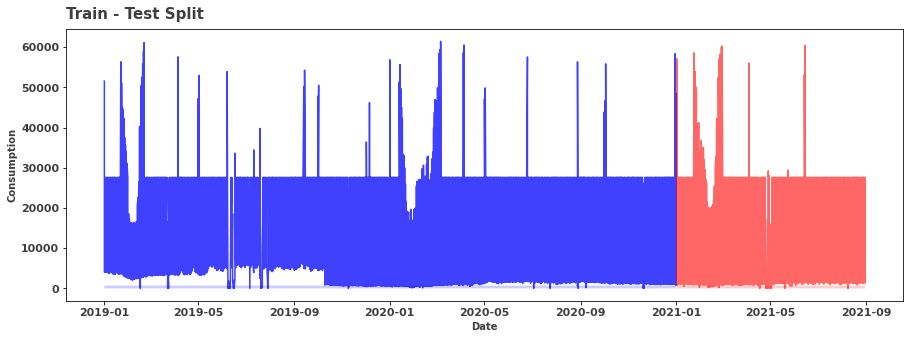

In [67]:
fig,ax = plt.subplots(figsize=(15,5))

coloring = 700

plt.plot(consum_train.index,consum_train["AvgMinPower"],color="blue", alpha=0.75)
plt.fill_between(consum_train.index,coloring, facecolor="blue", alpha=0.2)

plt.plot(consum_test.index,consum_test["AvgMinPower"], color = "red", alpha=0.60)
plt.fill_between(consum_test.index,coloring, facecolor="red", alpha=0.2)

plt.xlabel("Date", alpha=0.75, weight="bold")
plt.ylabel("Consumption", alpha=0.75, weight="bold")

plt.xticks(alpha=0.75,weight="bold", fontsize=11)
plt.yticks(alpha=0.75,weight="bold", fontsize=11)

plt.title("Train - Test Split", alpha=0.75, weight="bold", fontsize=15, pad=10, loc="left")

In [68]:
#Train - Test
X_train = consum_train.drop("AvgMinPower", axis=1) 
y_train = consum_train["AvgMinPower"]
X_test = consum_test.drop("AvgMinPower", axis=1)
y_test = consum_test["AvgMinPower"]

In [69]:
X_train = X_train.drop('SectorType', axis=1)
X_test = X_test.drop('SectorType', axis=1)

In [70]:
#XGBoost
import xgboost as xgb
from xgboost import plot_importance, plot_tree
xgd_reg1 = xgb.XGBRegressor(n_estimators=100)

xgd_reg1.fit(X_train,y_train,
           eval_set=[(X_train,y_train),(X_test,y_test)],
           early_stopping_rounds=50,
           verbose=True)

[0]	validation_0-rmse:13013.86833	validation_1-rmse:12643.85940
[1]	validation_0-rmse:9553.34674	validation_1-rmse:9502.84847
[2]	validation_0-rmse:7135.14045	validation_1-rmse:7464.90802
[3]	validation_0-rmse:5523.87487	validation_1-rmse:6208.78765
[4]	validation_0-rmse:4410.77355	validation_1-rmse:5445.78524
[5]	validation_0-rmse:3692.29950	validation_1-rmse:5095.22038
[6]	validation_0-rmse:3175.17408	validation_1-rmse:4932.15499
[7]	validation_0-rmse:2830.64079	validation_1-rmse:4841.22357
[8]	validation_0-rmse:2666.93288	validation_1-rmse:4816.52090
[9]	validation_0-rmse:2486.95074	validation_1-rmse:4676.76277
[10]	validation_0-rmse:2405.71039	validation_1-rmse:4643.47657
[11]	validation_0-rmse:2300.40091	validation_1-rmse:4670.16112
[12]	validation_0-rmse:2231.18792	validation_1-rmse:4665.26371
[13]	validation_0-rmse:2185.04319	validation_1-rmse:4640.81094
[14]	validation_0-rmse:2129.27491	validation_1-rmse:4640.35567
[15]	validation_0-rmse:2102.83713	validation_1-rmse:4635.77594


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

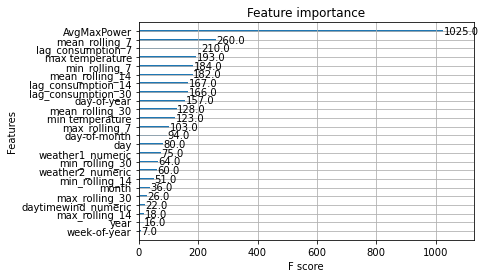

In [71]:
plot_importance(xgd_reg1)

# Feature Selection

In [72]:
data = merged_df
data.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,weather1_numeric,weather2_numeric,daytimewind_numeric,nightwind_numeric,hour,day,month,year,quarter,day-of-year,day-of-month,week-of-year
date,,,,,,,,,,,,,,,,,,
2019-01-01,Large industrial electricity,117888.3300,51526.5690,2019-01-01,12.0,7.0,1,1,1,1,0,1,1,2019,1,1,1,1
2019-01-01,business electricity,64027.8582,23758.7970,2019-01-01,12.0,7.0,1,1,1,1,0,1,1,2019,1,1,1,1
2019-01-01,general industry,6179.9364,4093.0467,2019-01-01,12.0,7.0,1,1,1,1,0,1,1,2019,1,1,1,1
2019-01-02,general industry,10711.9704,3971.5308,2019-01-02,11.0,6.0,4,4,1,1,0,2,1,2019,1,2,2,1
2019-01-02,business electricity,75467.2143,20231.6265,2019-01-02,11.0,6.0,4,4,1,1,0,2,1,2019,1,2,2,1


In [73]:
data.drop(columns=['weather1_numeric','weather2_numeric','daytimewind_numeric','nightwind_numeric'],inplace=True)


In [74]:
data.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,hour,day,month,year,quarter,day-of-year,day-of-month,week-of-year
date,,,,,,,,,,,,,,
2019-01-01,Large industrial electricity,117888.3300,51526.5690,2019-01-01,12.0,7.0,0,1,1,2019,1,1,1,1
2019-01-01,business electricity,64027.8582,23758.7970,2019-01-01,12.0,7.0,0,1,1,2019,1,1,1,1
2019-01-01,general industry,6179.9364,4093.0467,2019-01-01,12.0,7.0,0,1,1,2019,1,1,1,1
2019-01-02,general industry,10711.9704,3971.5308,2019-01-02,11.0,6.0,0,2,1,2019,1,2,2,1
2019-01-02,business electricity,75467.2143,20231.6265,2019-01-02,11.0,6.0,0,2,1,2019,1,2,2,1


In [75]:
data.to_csv(r"C:\Users\86130\00.Project\00.Data Preprocessing\Merged_SectorType1209.csv",index=True,header=True) 

In [76]:
sector_mapping = {
    'Large industrial electricity':0,
    'business electricity':1,
    'general industry':2,
    'non-general industry':3,
}

In [77]:
data['Type'] = data['SectorType'].map(sector_mapping)

In [78]:
data.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,hour,day,month,year,quarter,day-of-year,day-of-month,week-of-year,Type
date,,,,,,,,,,,,,,,
2019-01-01,Large industrial electricity,117888.3300,51526.5690,2019-01-01,12.0,7.0,0,1,1,2019,1,1,1,1,0
2019-01-01,business electricity,64027.8582,23758.7970,2019-01-01,12.0,7.0,0,1,1,2019,1,1,1,1,1
2019-01-01,general industry,6179.9364,4093.0467,2019-01-01,12.0,7.0,0,1,1,2019,1,1,1,1,2
2019-01-02,general industry,10711.9704,3971.5308,2019-01-02,11.0,6.0,0,2,1,2019,1,2,2,1,2
2019-01-02,business electricity,75467.2143,20231.6265,2019-01-02,11.0,6.0,0,2,1,2019,1,2,2,1,1


In [79]:
data.drop(columns=['SectorType'], inplace=True)

In [80]:
data.head()

,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,hour,day,month,year,quarter,day-of-year,day-of-month,week-of-year,Type
date,,,,,,,,,,,,,,
2019-01-01,117888.3300,51526.5690,2019-01-01,12.0,7.0,0,1,1,2019,1,1,1,1,0
2019-01-01,64027.8582,23758.7970,2019-01-01,12.0,7.0,0,1,1,2019,1,1,1,1,1
2019-01-01,6179.9364,4093.0467,2019-01-01,12.0,7.0,0,1,1,2019,1,1,1,1,2
2019-01-02,10711.9704,3971.5308,2019-01-02,11.0,6.0,0,2,1,2019,1,2,2,1,2
2019-01-02,75467.2143,20231.6265,2019-01-02,11.0,6.0,0,2,1,2019,1,2,2,1,1


In [81]:
data.to_csv(r"C:\Users\86130\00.Project\00.Data Preprocessing\Merged_SectorType and Climate.csv",index=True,header=True) 